In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [6]:
df = pd.read_csv(r'C:\Users\LENOVO\Desktop\rise intership\sales forecasting with linear regression\sales_data.csv')

In [8]:
df.head()

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0


In [12]:
df['Date'] = pd.to_datetime(df['date'])

print(df.isnull().sum())  # Check for nulls


date        0
product     0
category    0
price       2
quantity    1
revenue     1
Date        0
dtype: int64


In [14]:
df['Quantity'] = df['quantity'].fillna(0)
df['Revenue'] = df['revenue'].fillna(0)


In [16]:
df_monthly = df.groupby(df['Date'].dt.to_period('M')).agg({
'Quantity': 'sum',
'Revenue': 'sum'
}).reset_index()


In [18]:
# Convert Period to datetime for plotting
df_monthly['Date'] = df_monthly['Date'].dt.to_timestamp()


In [20]:
# Convert date to ordinal (numeric) for regression
df_monthly['Date_Ordinal'] = df_monthly['Date'].map(lambda x: x.toordinal())


In [22]:
# Define X and y
X = df_monthly[['Date_Ordinal']]
y = df_monthly['Revenue']


In [24]:
# Split into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [26]:
# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
# Predict
y_pred = model.predict(X_test)


In [30]:
# Evaluate
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Squared Error: 20656391.42285187
R² Score: -20.09182033601085


In [32]:
# Create DataFrame for comparison
results = pd.DataFrame({
'Actual': y_test,
'Predicted': y_pred
}, index=X_test.index)


In [34]:
# Sort by index for clarity
results = results.sort_index()


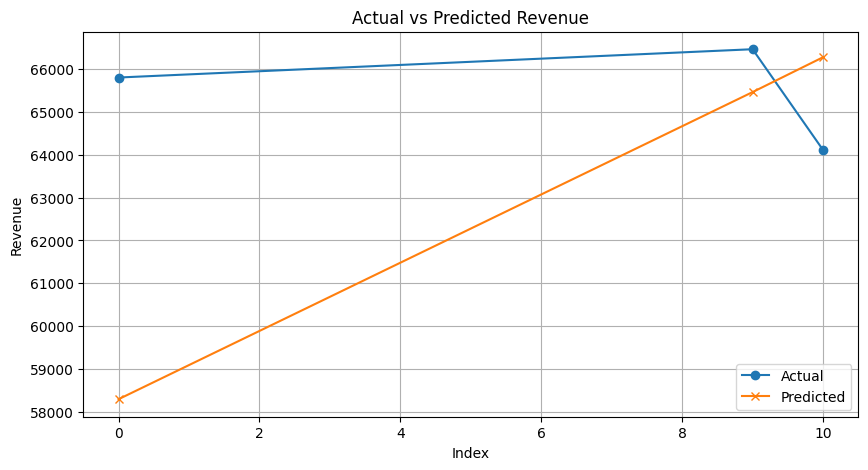

In [36]:
# Plot
plt.figure(figsize=(10,5))
plt.plot(results.index, results['Actual'], label='Actual', marker='o')
plt.plot(results.index, results['Predicted'], label='Predicted', marker='x')
plt.title('Actual vs Predicted Revenue')
plt.xlabel('Index')
plt.ylabel('Revenue')
plt.legend()
plt.grid()
plt.show()


In [38]:
# Get the last date
last_date = df_monthly['Date'].max()


In [40]:
# Create future dates
future_dates = [last_date + pd.DateOffset(months=i) for i in range(1, 7)]
future_ordinal = [date.toordinal() for date in future_dates]


In [44]:
# Predict future revenue
future_pred = model.predict(np.array(future_ordinal).reshape(-1,1))


C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [46]:
# Show results
forecast_df = pd.DataFrame({
'Date': future_dates,
'Predicted_Revenue': future_pred
})
print(forecast_df)


        Date  Predicted_Revenue
0 2023-01-01       67874.029516
1 2023-02-01       68687.384792
2 2023-03-01       69422.028267
3 2023-04-01       70235.383544
4 2023-05-01       71022.501553
5 2023-06-01       71835.856829


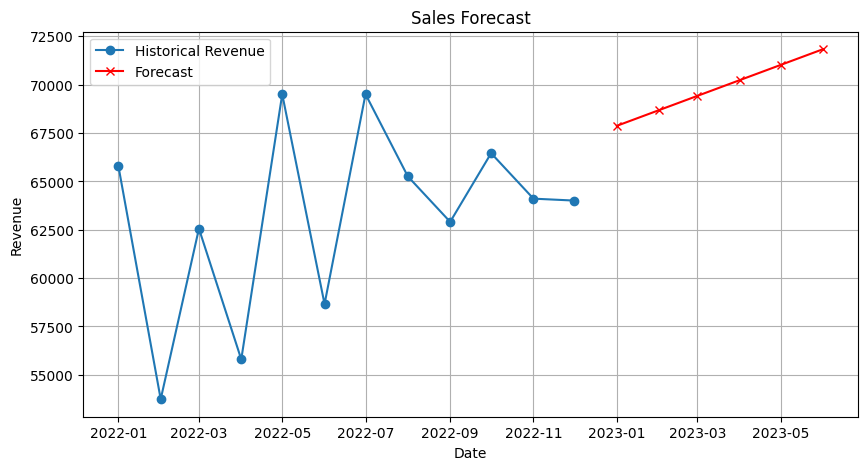

In [48]:
# Plot future forecast
plt.figure(figsize=(10,5))
plt.plot(df_monthly['Date'], df_monthly['Revenue'], label='Historical Revenue', marker='o')
plt.plot(forecast_df['Date'], forecast_df['Predicted_Revenue'], label='Forecast', marker='x', color='red')
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.grid()
plt.show()
